In [1]:
# This class tests whether tensorflow and autograd both calculate the hessian-vector-products identically.

# The rosenbrock function is not a least squares optimization problem. 
# Additionally, I have formulated the loss function in such a way that to find a minimum, we need to 
# calculate the hessian-vector product.

In [2]:
from autograd import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sopt.optimizers.autograd.curveball import Curveball as agCb
from sopt.optimizers.tensorflow.curveball import Curveball as tfCb

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def rosenbrock(x):
    x_reshaped = np.reshape(x, [2, -1])
    return np.sum(100*(x_reshaped[1] - x_reshaped[0]**2)**2 + (1 - x_reshaped[0])**2)

In [5]:
x_fn = lambda z: z
z_init = np.zeros(10)

In [6]:
# Autograd
cball_ag = agCb(z_init, x_fn, rosenbrock, squared_loss=False)

In [7]:
ag_losses = []
for i in range(30):
    out = cball_ag.minimize()
    lossval = rosenbrock(x_fn(out))
    ag_losses.append(lossval)

In [8]:
# Tensorflow
tf.reset_default_graph()
tf_var = tf.Variable(z_init, dtype='float32')
tf_x_fn = lambda x: tf.identity(x)
tf_x_fn_tensor = tf_x_fn(tf_var)

def tf_rosenbrock(x):
    x_reshaped = tf.reshape(x, [2, -1])
    return tf.reduce_sum(100*(x_reshaped[1] - x_reshaped[0]**2)**2 + (1 - x_reshaped[0])**2)

tf_rosenbrock_tensor = tf_rosenbrock(tf_x_fn_tensor)

cball_tf = tfCb(tf_var, tf_x_fn, tf_rosenbrock, name='ros', squared_loss=False)
minimizer = cball_tf.minimize()

session = tf.Session()
session.run(tf.global_variables_initializer())

W0926 14:33:13.870680 139857569249088 deprecation_wrapper.py:119] From /raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/curveball.py:50: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0926 14:33:13.890705 139857569249088 deprecation_wrapper.py:119] From /raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/curveball.py:54: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0926 14:33:13.939763 139857569249088 deprecation.py:323] From /raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0926 14:33:14.505037 139857569249088 deprecation_wrapper.py:119] From /raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/curveball.p

In [9]:
tf_losses = []
for i in range(30):
    session.run(minimizer)
    lossval = session.run(tf_rosenbrock_tensor)
    #session.run(damping_update, feed_dict={placeholder:lossval})
    tf_losses.append(lossval)

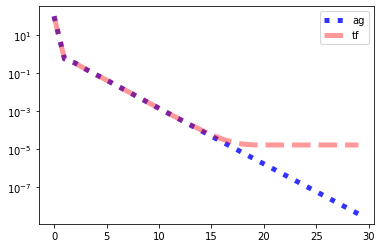

In [10]:
# The discrepancy here is because curveball requires a matrix inversion step
# the matrix becomes singular fairly often
# I tried calculating the pseudo inverse myself, but all the approach I tried for this 
# in tensorflow game solutions less stable and accurate than the numpy counterpart.
plt.plot(ag_losses, color='blue', ls=':', linewidth=5.0, alpha=0.8, label='ag')
plt.plot(tf_losses, color='red', ls='--', linewidth=5.0, alpha=0.4, label='tf')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [11]:
# Solution is all ones
session.run(tf_var)

array([0.99820983, 0.99820983, 0.99820983, 0.99820983, 0.99820983,
       0.9964178 , 0.9964178 , 0.9964178 , 0.9964178 , 0.9964178 ],
      dtype=float32)